In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import scipy.interpolate as interp
from sys import platform
from scipy.optimize import curve_fit
from astropy import units as u

In [2]:
if platform=='win32':
    %run utils\getFMext
else:  
    %run utils/getFMext.py

In [3]:
if platform=='win32':
    %run utils\getMag.py
else:  
    %run utils/getMag.py

In [4]:
x1,f1=np.loadtxt('AATau_IR2008.txt',unpack=True)
x2,f2=np.loadtxt('AATau_opt2008.txt',unpack=True)
x3,f3=np.loadtxt('AATau_IR2014dec02.txt',unpack=True)
x4,f4=np.loadtxt('AATau_opt2014dec02.txt',unpack=True)
x5,f5=np.loadtxt('AATau_IR2014dec12.txt',unpack=True)
x6,f6=np.loadtxt('AATau_opt2014dec12.txt',unpack=True)


# mask out the NaNs:
def maskNans(wavelength,data):
    masked_data=data[np.logical_not(np.isnan(data))]
    masked_wavelength=wavelength[np.logical_not(np.isnan(data))]
    return (masked_wavelength,masked_data)

x1,f1=maskNans(x1,f1)
x2,f2=maskNans(x2,f2)
x3,f3=maskNans(x3,f3)
x4,f4=maskNans(x4,f4)
x5,f5=maskNans(x5,f5)
x6,f6=maskNans(x6,f6)


u.flam = u.erg / (u.cm * u.cm * u.s * u.AA)


In [5]:
# QUICK AND DIRTY REPLACE:
# x3,f3=x5,f5
# x4,f4=x6,f6

scalings=np.array([.46,(1.80+0.46)/2.0,1.80]) # Dec02
# scalings=np.array([0.33,(1.29+0.33)/2.0,1.29]) # Dec12


In [6]:
xobs1,fobs1=np.append(x2,x1),np.append(f2,f1)
xobs2,fobs2=np.append(x4,x3),np.append(f4,f3)

xobs1=xobs1*u.micron
xobs2=xobs2*u.micron
fobs1=fobs1*u.flam
fobs2=fobs2*u.flam

xobs1clip,fobs1clip=xobs1[1000:],fobs1[1000:]
xobs2clip,fobs2clip=xobs2[500:],fobs2[500:]

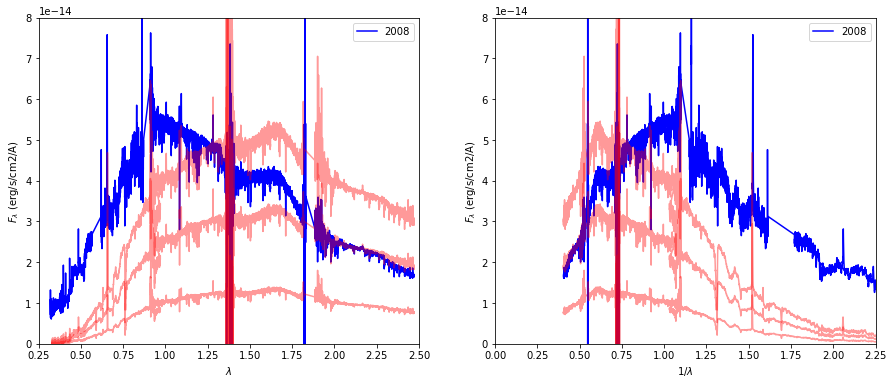

In [7]:
fig,[ax1,ax2]=plt.subplots(1,2,figsize=(15,6))


ax1.plot(xobs1, fobs1, label='2008',color='blue')
ax1.set_ylim(0,0.8E-13)
ax1.set_xlim(0.25,2.5)
ax1.set_xlabel('$\lambda$')
ax1.set_ylabel('$F_\lambda$ (erg/s/cm2/A)')
for scale in scalings:
    if scale==1.0:
        ax1.plot(xobs2, scale*fobs2, color='red', alpha=0.4, label='2014Dec02')
    else:
        ax1.plot(xobs2, scale*fobs2, color='red', alpha=0.4)
ax1.legend(loc='best')

ax2.plot(1./xobs1, fobs1, label='2008', color='blue')
ax2.set_ylim(0,0.8E-13)
ax2.set_xlim(0,2.25)
ax2.set_xlabel('1/$\lambda$')
ax2.set_ylabel('$F_\lambda$ (erg/s/cm2/A)')   
for scale in scalings:
    if scale==1.0:
        ax2.plot(1./xobs2, scale*fobs2, color='red', alpha=0.4, label='2014Dec02')
    else:
        ax2.plot(1./xobs2, scale*fobs2, color='red',alpha=0.4)
ax2.legend(loc='best')

plt.show()

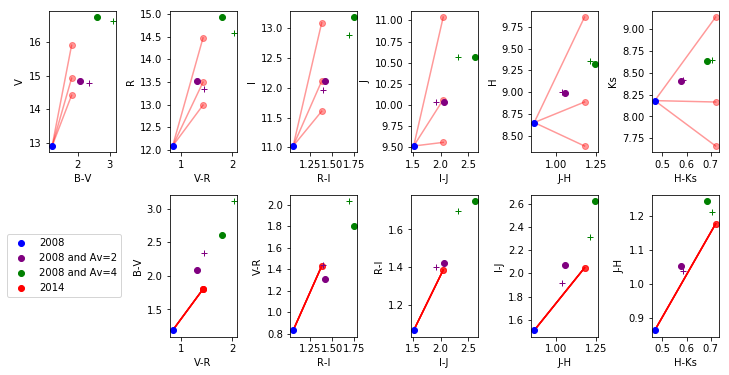

In [8]:
fig,axes=plt.subplots(2,6,figsize=(12,6))

bands=['Ks','H','J','I','R','V','B']

mags1=np.zeros(7)

for j in [0,1,2,3,4,5,6]: 
    mags1[j]=getMag(bands[j], xobs1, fobs1)

Av=2.0
Rv=3.0
fobs1ext1 = fobs1clip * 10.**(-0.4*Av*getFMext(xobs1clip,Rv,'fmunred')/Rv)
Av=4.0
Rv=3.0
fobs1ext2 = fobs1clip * 10.**(-0.4*Av*getFMext(xobs1clip,Rv,'fmunred')/Rv)
Av=2.0
Rv=2.0
fobs1ext3 = fobs1clip * 10.**(-0.4*Av*getFMext(xobs1clip,Rv,'fmunred')/Rv)
Av=4.0
Rv=2.0
fobs1ext4 = fobs1clip * 10.**(-0.4*Av*getFMext(xobs1clip,Rv,'fmunred')/Rv)


mags1ext1=np.zeros(7)
mags1ext2=np.zeros(7)
mags1ext3=np.zeros(7)
mags1ext4=np.zeros(7)

for j in [0,1,2,3,4,5,6]:
    mags1ext1[j]=getMag(bands[j], xobs1clip, fobs1ext1)
    mags1ext2[j]=getMag(bands[j], xobs1clip, fobs1ext2)
    mags1ext3[j]=getMag(bands[j], xobs1clip, fobs1ext3)
    mags1ext4[j]=getMag(bands[j], xobs1clip, fobs1ext4)

for scale in scalings:
    mags2=np.zeros(7)

    for j in [0,1,2,3,4,5,6]:
        mags2[j]=getMag(bands[j], xobs2, scale*fobs2)

    for j in [0,1,2,3,4,5]:
        if j!=5:
            axes[1,5-j].plot(mags2[j+1]-mags2[j],mags2[j+2]-mags2[j+1],'o',color='red',alpha=0.4)
            axes[1,5-j].plot([mags1[j+1]-mags1[j],mags2[j+1]-mags2[j]],[mags1[j+2]-mags1[j+1],mags2[j+2]-mags2[j+1]],color='red') # line
                    
        axes[0,5-j].plot(mags2[j+1]-mags2[j],mags2[j],'o',color='red',alpha=0.4,label='2014')
        axes[0,5-j].plot([mags1[j+1]-mags1[j],mags2[j+1]-mags2[j]],[mags1[j],mags2[j]],color='red',alpha=0.4) # line
        

for j in [0,1,2,3,4,5]:
    if j!=5:
        axes[1,5-j].plot(mags1[j+1]-mags1[j],mags1[j+2]-mags1[j+1],'o',color='blue',label='2008')
        axes[1,5-j].plot(mags1ext1[j+1]-mags1ext1[j],mags1ext1[j+2]-mags1ext1[j+1],'o',color='purple',label='2008 and Av=2')
        axes[1,5-j].plot(mags1ext2[j+1]-mags1ext2[j],mags1ext2[j+2]-mags1ext2[j+1],'o',color='green',label='2008 and Av=4')
        axes[1,5-j].plot(mags1ext3[j+1]-mags1ext3[j],mags1ext3[j+2]-mags1ext3[j+1],'+',color='purple')
        axes[1,5-j].plot(mags1ext4[j+1]-mags1ext4[j],mags1ext4[j+2]-mags1ext4[j+1],'+',color='green')
        axes[1,5-j].set_xlabel(bands[j+1]+'-'+bands[j])
        axes[1,5-j].set_ylabel(bands[j+2]+'-'+bands[j+1])

    axes[0,5-j].plot(mags1[j+1]-mags1[j],mags1[j],'o',color='blue')
    axes[0,5-j].plot(mags1ext1[j+1]-mags1ext1[j],mags1ext1[j],'o',color='purple')
    axes[0,5-j].plot(mags1ext2[j+1]-mags1ext2[j],mags1ext2[j],'o',color='green')
    axes[0,5-j].plot(mags1ext3[j+1]-mags1ext3[j],mags1ext3[j],'+',color='purple')
    axes[0,5-j].plot(mags1ext4[j+1]-mags1ext4[j],mags1ext4[j],'+',color='green')
    axes[0,5-j].set_xlabel(bands[j+1]+'-'+bands[j])
    axes[0,5-j].set_ylabel(bands[j])

axes[1,5-4].plot(mags2[4+1]-mags2[4],mags2[4+2]-mags2[4+1],'o',color='red',label='2014') # just for the legend
axes[1,0].axis('off')
fig.subplots_adjust(wspace=0.8,hspace=0.3)
axes[1,1].legend(loc='center left', bbox_to_anchor=(-2.5, 0.5))
plt.show()

C:\Users\larsonk\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys
C:\Users\larsonk\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\larsonk\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in log10


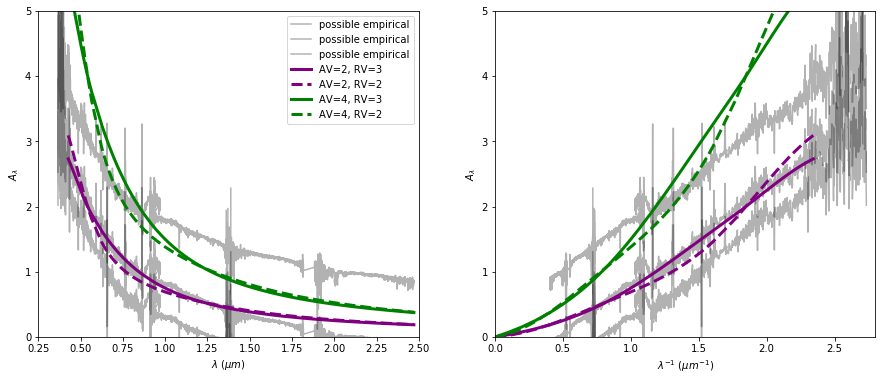

In [9]:
fig,[ax3,ax4]=plt.subplots(1,2,figsize=(15,6))


finterp=interp.interp1d(xobs1,fobs1)

for scale in scalings:
    ax3.plot(xobs2[150:],-2.5*np.log10(scale*fobs2[150:].value/finterp(xobs2[150:])),color='black',label='possible empirical',alpha=0.3)

Av=2.
Rv=3.
ax3.plot(xobs1clip,Av*getFMext(xobs1clip,Rv,'fmunred')/Rv,'-',color='purple',label='AV=2, RV=3',linewidth=3)
Rv=2.
ax3.plot(xobs1clip,Av*getFMext(xobs1clip,Rv,'fmunred')/Rv,'--',color='purple',label='AV=2, RV=2',linewidth=3)

Av=4.
Rv=3.
ax3.plot(xobs1clip,Av*getFMext(xobs1clip,Rv,'fmunred')/Rv,'g-',label='AV=4, RV=3',linewidth=3)
Rv=2.
ax3.plot(xobs1clip,Av*getFMext(xobs1clip,Rv,'fmunred')/Rv,'g--',label='AV=4, RV=2',linewidth=3)
ax3.set_ylim(0,5)
ax3.set_xlim(0.25,2.5)
ax3.legend(loc='best')
ax3.set_xlabel('$\lambda\ (\mu m)$')
ax3.set_ylabel('$A_\lambda$')    

x=1./np.array([0,.1,.2,.3,.4])

for scale in scalings:
    ax4.plot(1./xobs2[150:],-2.5*np.log10(scale*fobs2[150:].value/finterp(xobs2[150:])),color='black',alpha=0.3)

Av=2.
Rv=3.
ax4.plot(1./xobs1clip,Av*getFMext(xobs1clip,Rv,'fmunred')/Rv,'-',color='purple',linewidth=3)
ax4.plot(1./x,Av*getFMext(x,Rv,'fmunred')/Rv,'-',color='purple',linewidth=3)
Rv=2.
ax4.plot(1./xobs1clip,Av*getFMext(xobs1clip,Rv,'fmunred')/Rv,'--',color='purple',linewidth=3)
ax4.plot(1./x,Av*getFMext(x,Rv,'fmunred')/Rv,'--',color='purple',linewidth=3)

Av=4.
Rv=3.
ax4.plot(1./xobs1clip,Av*getFMext(xobs1clip,Rv,'fmunred')/Rv,'g-',linewidth=3)
ax4.plot(1./x,Av*getFMext(x,Rv,'fmunred')/Rv,'g-',linewidth=3)
Rv=2.
ax4.plot(1./xobs1clip,Av*getFMext(xobs1clip,Rv,'fmunred')/Rv,'g--',linewidth=3)
ax4.plot(1./x,Av*getFMext(x,Rv,'fmunred')/Rv,'g--',linewidth=3)

ax4.set_ylim(0,5)
ax4.set_xlim(0,2.8)
ax4.set_xlabel('$\lambda^{-1}\ (\mu m^{-1})$')
ax4.set_ylabel('$A_\lambda$')    

plt.show()
  

In [10]:
# Find A(\lambda=V):
# Dec02: xobs2[900],-2.5*np.log10(scale*fobs2[900]/finterp(xobs2[900]))
xobs2[900],-2.5*np.log10(scale*fobs2[900].value/finterp(xobs2[900]))

(<Quantity 0.55084 micron>, 1.527666464362736)

C:\Users\larsonk\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.
C:\Users\larsonk\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\larsonk\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in log10


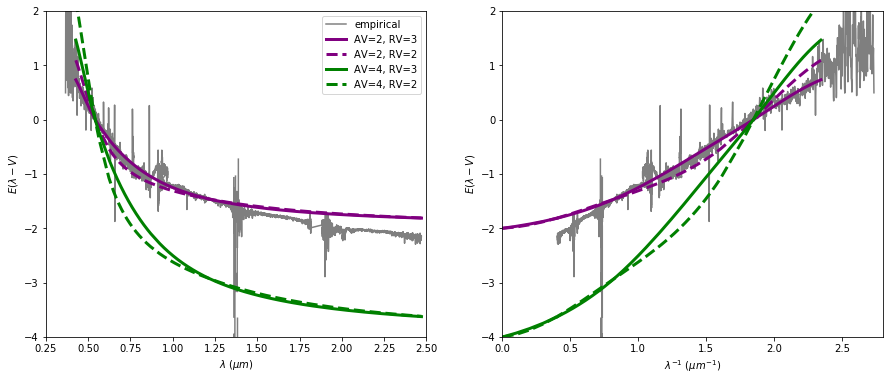

In [11]:

fig,[ax3,ax4]=plt.subplots(1,2,figsize=(15,6))


finterp=interp.interp1d(xobs1,fobs1)

scale=1.0

A55=-2.5*np.log10(scale*fobs2[900].value/finterp(xobs2[900]))
ax3.plot(xobs2[150:],-2.5*np.log10(scale*fobs2[150:].value/finterp(xobs2[150:]))-A55,color='black',label='empirical',alpha=0.5)

## fit=np.array([1.65870826,  0.80872665, -2.94786255])
#fit=np.array([ 1.48353674, -2.74421504])
#ax3.plot(xobs2[4400:],fit[0]*xobs2[4400:]**-1.0+fit[1],color='orange',label='NIR fit',linewidth=3)

Av=2.
Rv=3.
ax3.plot(xobs1clip,Av*getFMext(xobs1clip,Rv,'fmunred')/Rv-2.0,'-',color='purple',label='AV=2, RV=3',linewidth=3)
Rv=2.
ax3.plot(xobs1clip,Av*getFMext(xobs1clip,Rv,'fmunred')/Rv-2.0,'--',color='purple',label='AV=2, RV=2',linewidth=3)

Av=4.
Rv=3.
ax3.plot(xobs1clip,Av*getFMext(xobs1clip,Rv,'fmunred')/Rv-4.0,'g-',label='AV=4, RV=3',linewidth=3)
Rv=2.
ax3.plot(xobs1clip,Av*getFMext(xobs1clip,Rv,'fmunred')/Rv-4.0,'g--',label='AV=4, RV=2',linewidth=3)

ax3.set_xlim(0.25,2.5)
ax3.set_ylim(-4,2)
ax3.legend(loc='best')
ax3.set_xlabel('$\lambda\ (\mu m)$')
ax3.set_ylabel('$E(\lambda-V)$')    

x=1./np.array([0,.1,.2,.3,.4])


ax4.plot(1./xobs2[150:],-2.5*np.log10(scale*fobs2[150:].value/finterp(xobs2[150:]))-A55,color='black',alpha=0.5)

#ax4.plot(1./xobs2[4400:],fit[0]*xobs2[4400:]**-1.0+fit[1],color='orange',label='NIR fit',linewidth=3)
#ax4.plot(1./x,fit[0]*x**-1.0+fit[1],color='orange',label='NIR fit',linewidth=3)

Av=2.
Rv=3.
ax4.plot(1./xobs1clip,Av*getFMext(xobs1clip,Rv,'fmunred')/Rv-2.0,'-',color='purple',linewidth=3)
ax4.plot(1./x,Av*getFMext(x,Rv,'fmunred')/Rv-2.0,'-',color='purple',linewidth=3)
Rv=2.
ax4.plot(1./xobs1clip,Av*getFMext(xobs1clip,Rv,'fmunred')/Rv-2.0,'--',color='purple',linewidth=3)
ax4.plot(1./x,Av*getFMext(x,Rv,'fmunred')/Rv-2.0,'--',color='purple',linewidth=3)

Av=4.
Rv=3.
ax4.plot(1./xobs1clip,Av*getFMext(xobs1clip,Rv,'fmunred')/Rv-4.0,'g-',linewidth=3)
ax4.plot(1./x,Av*getFMext(x,Rv,'fmunred')/Rv-4.0,'g-',linewidth=3)
Rv=2.
ax4.plot(1./xobs1clip,Av*getFMext(xobs1clip,Rv,'fmunred')/Rv-4.0,'g--',linewidth=3)
ax4.plot(1./x,Av*getFMext(x,Rv,'fmunred')/Rv-4.0,'g--',linewidth=3)


ax4.set_xlim(0,2.8)
ax4.set_ylim(-4,2)
ax4.set_xlabel('$\lambda^{-1}\ (\mu m^{-1})$')
ax4.set_ylabel('$E(\lambda-V)$')      

plt.show()
  

In [14]:
A55

2.1658477271210015